Saving Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv to Final Sri_lanka_dengue_cases_weather_weekly_2007_2024 (3).csv
       Number_of_Cases      Week_Start_Date         Month          Year  \
count     22900.000000                22900  22900.000000  22900.000000   
mean         34.739607  2015-10-08 12:00:00      6.437773   2015.276201   
min           0.000000  2007-01-01 00:00:00      1.000000   2007.000000   
25%           2.000000  2011-05-21 06:00:00      3.000000   2011.000000   
50%           9.000000  2015-10-08 12:00:00      6.000000   2015.000000   
75%          31.000000  2020-02-25 18:00:00      9.000000   2020.000000   
max        2631.000000  2024-07-15 00:00:00     12.000000   2024.000000   
std          87.523903                  NaN      3.444179      5.073494   

               Week  Avg Max Temp (°C)  Avg Min Temp (°C)  \
count  22900.000000       22900.000000       22900.000000   
mean      26.222707          29.604291          23.525223   
min        

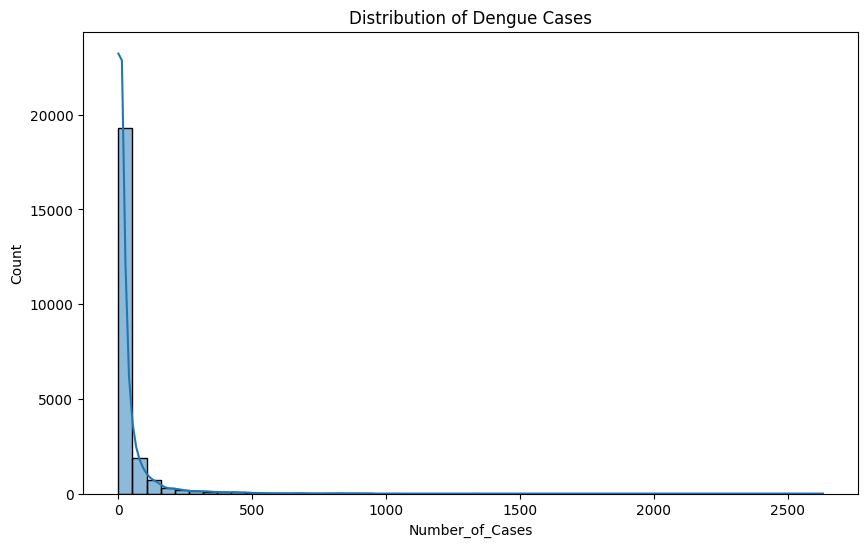

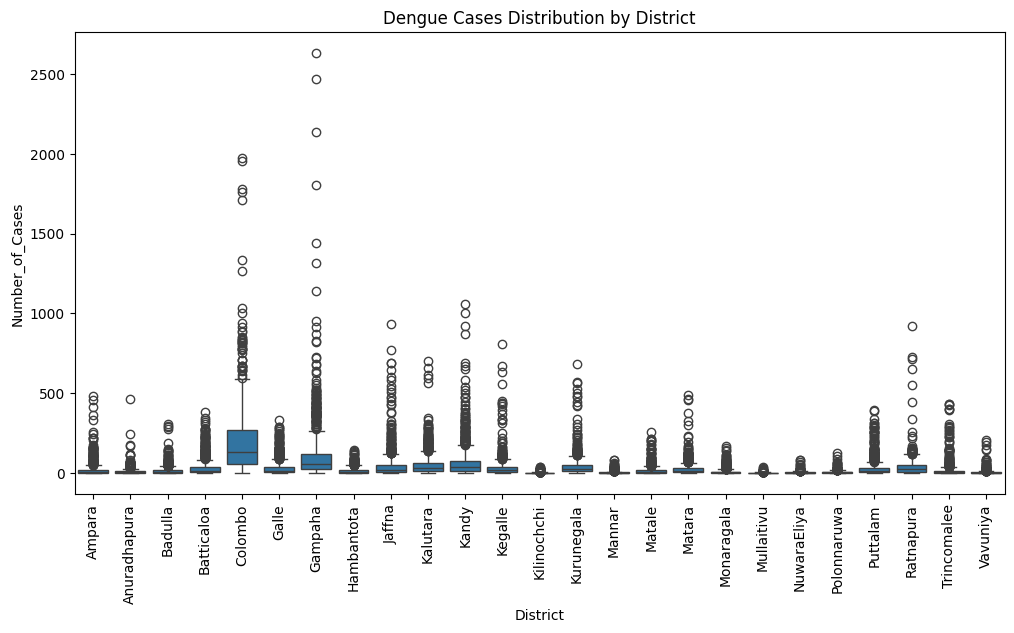

Processing district: Ampara
RMSE for Ampara: 6.205657113086298
Processing district: Anuradhapura
RMSE for Anuradhapura: 4.2285487371493495
Processing district: Badulla
RMSE for Badulla: 7.958807150046729
Processing district: Batticaloa
RMSE for Batticaloa: 4.299081173920726
Processing district: Colombo
RMSE for Colombo: 77.32809998151278
Processing district: Galle
RMSE for Galle: 10.563197373019511
Processing district: Gampaha
RMSE for Gampaha: 19.781233291300648
Processing district: Hambantota
RMSE for Hambantota: 6.525856446349258
Processing district: Jaffna
RMSE for Jaffna: 32.733998334007474
Processing district: Kalutara
RMSE for Kalutara: 14.401569170717254
Processing district: Kandy
RMSE for Kandy: 18.569682175784465
Processing district: Kegalle
RMSE for Kegalle: 17.83121216172111
Processing district: Kilinochchi
RMSE for Kilinochchi: 1.8054111845256091
Processing district: Kurunegala
RMSE for Kurunegala: 16.367086839165545
Processing district: Mannar
RMSE for Mannar: 3.138527226

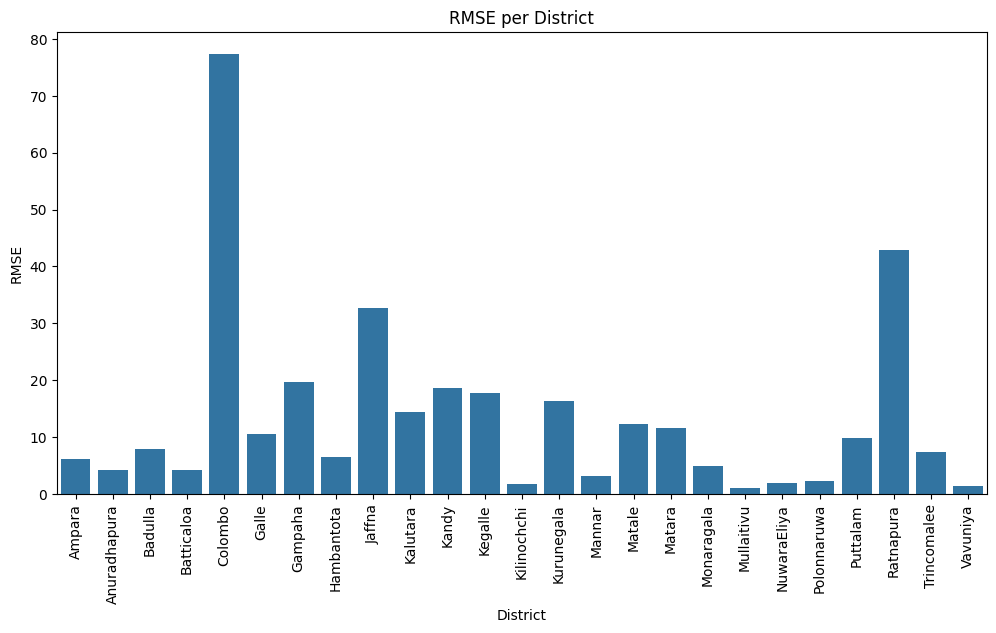

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np
import os
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset

# --- Importing Dataset ---
from google.colab import files
files.upload()
# --- Reading Dataset ---
data = pd.read_csv('Final Sri_lanka_dengue_cases_weather_weekly_2007_2024.csv')

# Convert "Week_Start_Date" to datetime
data['Week_Start_Date'] = pd.to_datetime(data['Week_Start_Date'])

# EDA - Exploratory Data Analysis

# Summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of Dengue cases
plt.figure(figsize=(10,6))
sns.histplot(data['Number_of_Cases'], bins=50, kde=True)
plt.title('Distribution of Dengue Cases')
plt.show()

# Boxplot to visualize dengue cases per district
plt.figure(figsize=(12,6))
sns.boxplot(x='District', y='Number_of_Cases', data=data)
plt.title('Dengue Cases Distribution by District')
plt.xticks(rotation=90)
plt.show()

# Group the data by district
districts = data['District'].unique()

# Dictionary to store RMSE values for each district
rmse_dict = {}

# Dates for train and test split
train_end_date = '2024-05-07'
test_end_date = '2024-07-30'

# Loop through each district and apply ARIMA model
for district in districts:
    print(f"Processing district: {district}")

    # Filter data for the district
    district_data = data[data['District'] == district].copy()

    # Set index to Week_Start_Date
    district_data.set_index('Week_Start_Date', inplace=True)

    # Focus on 'Number_of_Cases' column
    district_cases = district_data['Number_of_Cases']

    # Split the data: Training and Testing
    train_data = district_cases[:train_end_date]
    test_data = district_cases[train_end_date:test_end_date]

    # Check if there's enough data for both training and testing
    if len(train_data) < 2 or len(test_data) < 2:
        print(f"Not enough data for district: {district}")
        continue

    # Fit ARIMA model (using (5,1,2) as default, adjust this based on performance or stationarity test)
    try:
        model = ARIMA(train_data, order=(5,1,2))
        arima_result = model.fit()

        # Predict on test data
        test_predictions = arima_result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_data, test_predictions))
        print(f"RMSE for {district}: {rmse}")
        rmse_dict[district] = rmse

    except Exception as e:
        print(f"ARIMA model failed for {district}: {e}")
        continue

# Calculate the mean RMSE across all districts
mean_rmse = np.mean(list(rmse_dict.values()))
print(f"Mean RMSE across all districts: {mean_rmse}")

# Display RMSE for each district
rmse_df = pd.DataFrame(list(rmse_dict.items()), columns=['District', 'RMSE'])
print(rmse_df)

# Plot RMSE per district
plt.figure(figsize=(12,6))
sns.barplot(x='District', y='RMSE', data=rmse_df)
plt.title('RMSE per District')
plt.xticks(rotation=90)
plt.show()